In [29]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings  
warnings.filterwarnings('ignore')  
plt.style.use('fivethirtyeight')  
%matplotlib inline  

In [30]:
df = pd.read_csv("Churn_Modelling.csv")  
df.head()  

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [31]:
df.describe()  

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [32]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [33]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

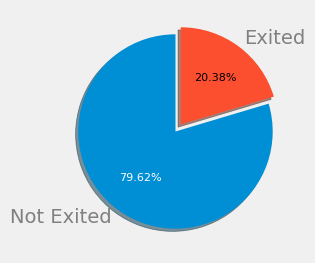

In [34]:
values = df.Exited.value_counts()  
labels = ['Not Exited', 'Exited']  
fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)  
explode = (0, 0.09)  
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,startangle = 90, explode = explode)  

plt.setp(texts, color = 'grey')  
plt.setp(autotexts, size = 8, color = 'white')  
autotexts[1].set_color('black')  
plt.show() 

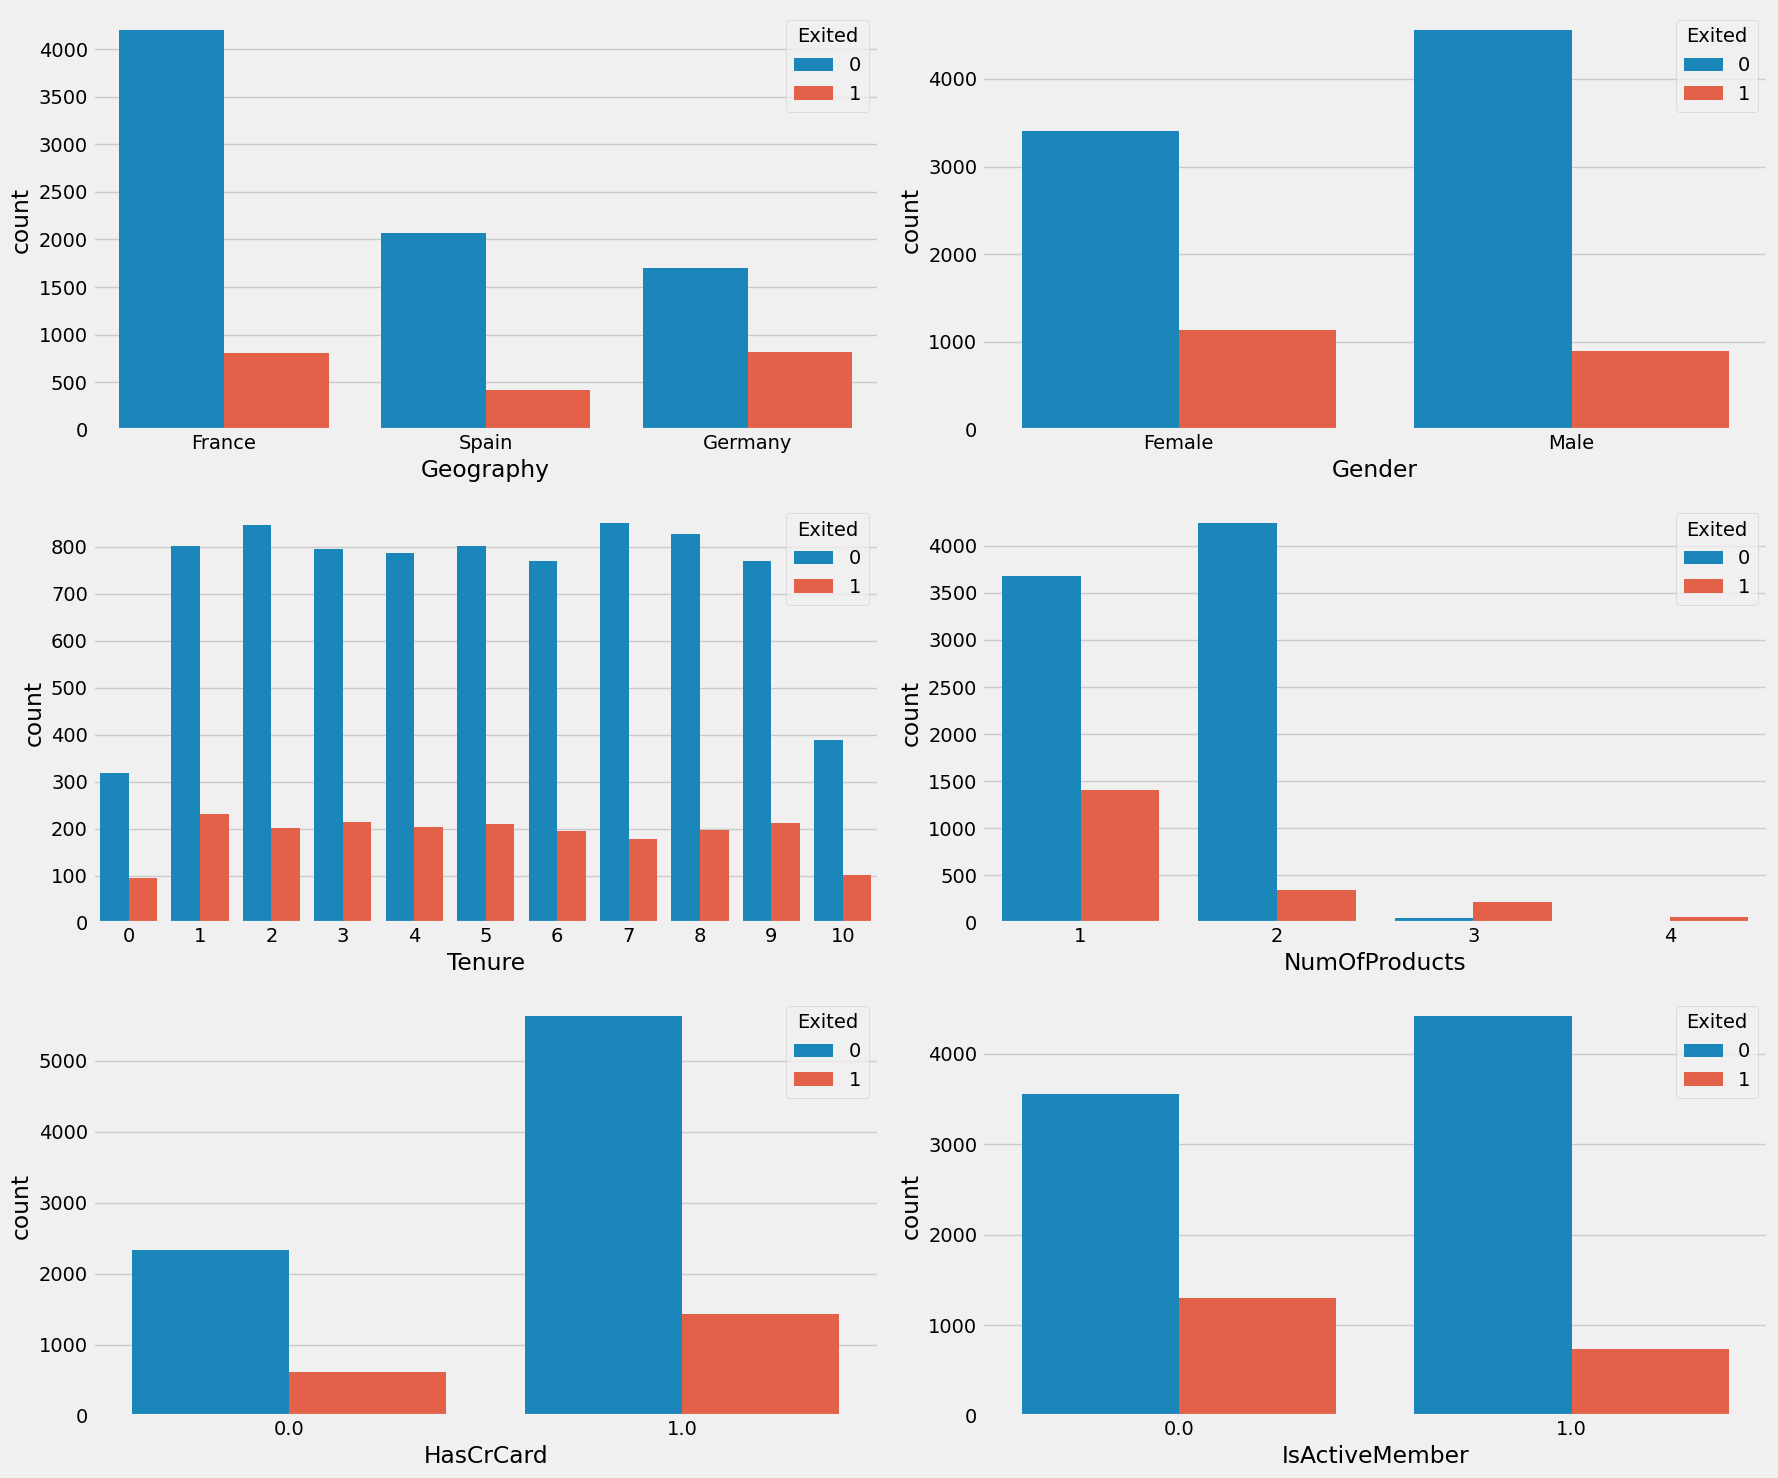

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 2, figsize=(18, 15))

sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[0][1])
sns.countplot(x='Tenure', hue='Exited', data=df, ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df, ax=ax[1][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax[2][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax[2][1])

plt.tight_layout()
plt.show()


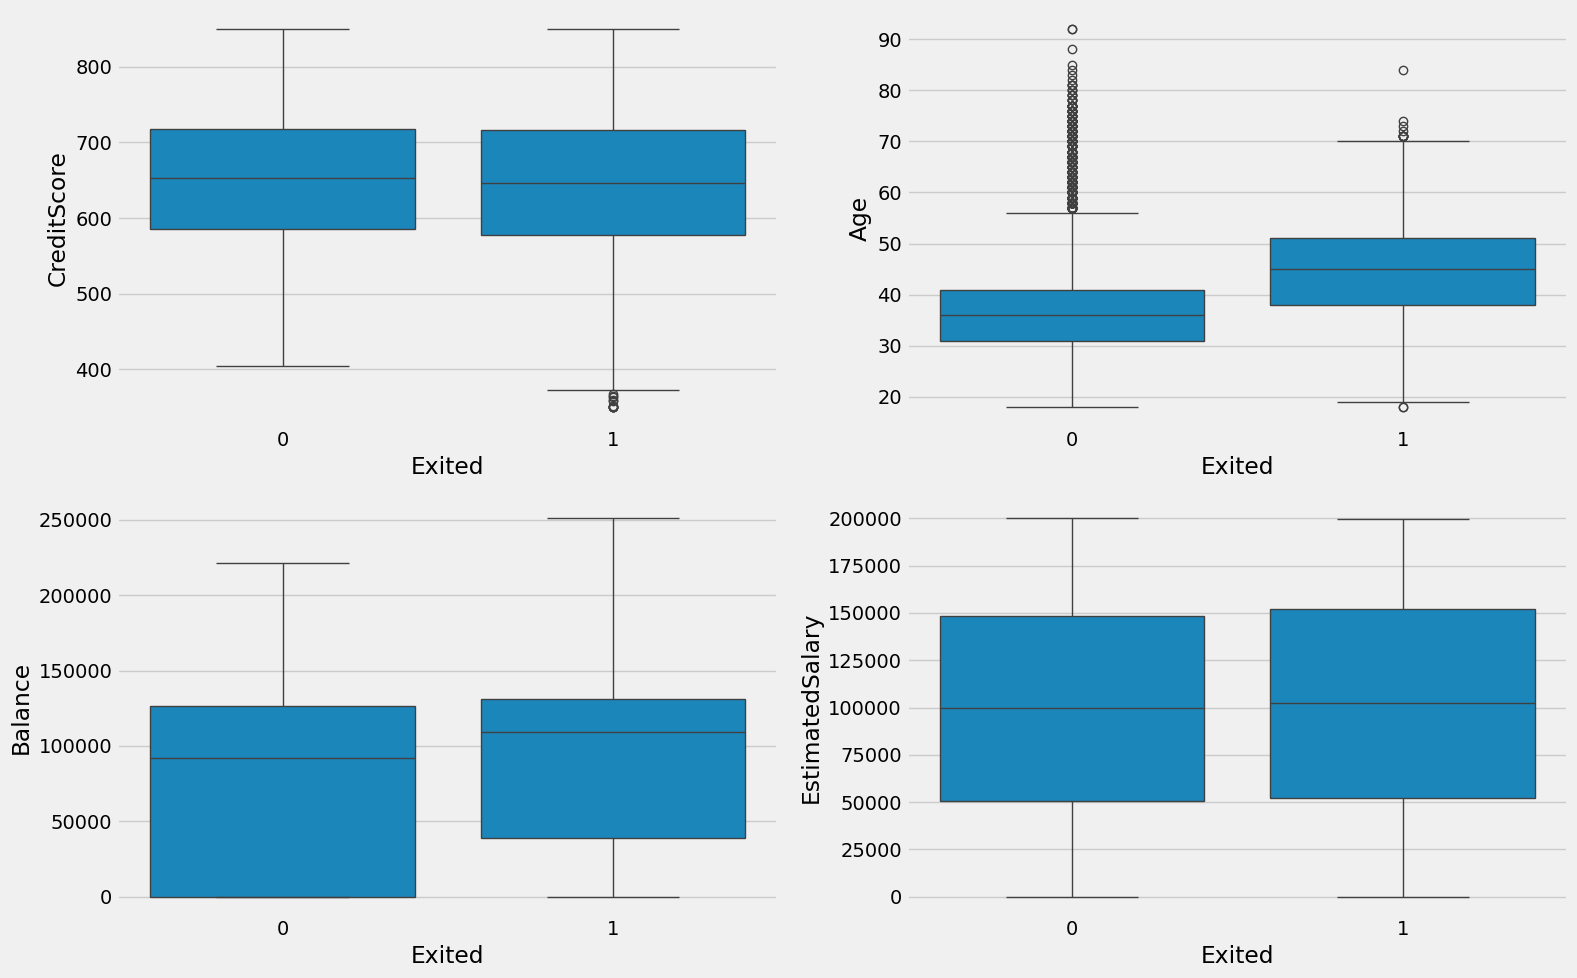

In [36]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

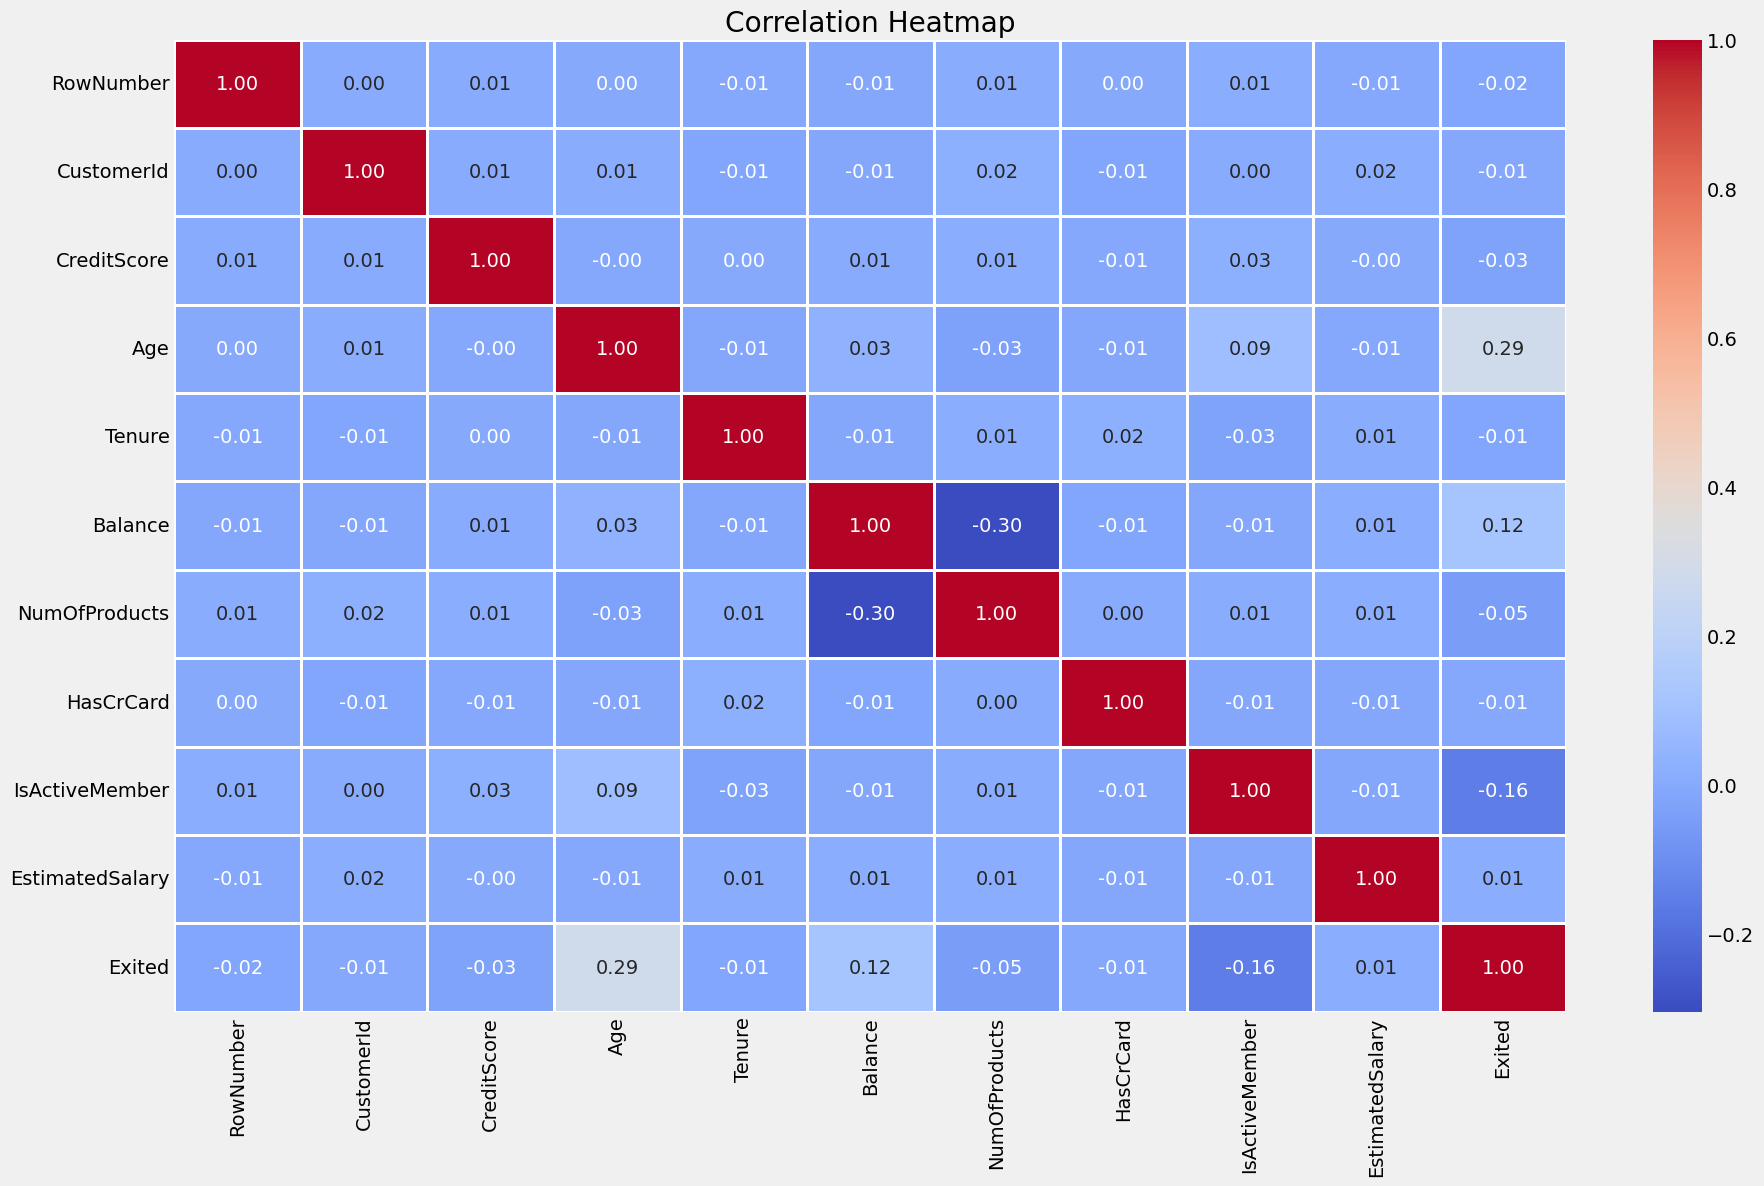

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20, 12))
corr = numeric_df.corr()  

sns.heatmap(corr, linewidths=1, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()


In [38]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [39]:
df.Geography.value_counts()  

Geography
France     5014
Germany    2510
Spain      2477
Name: count, dtype: int64

In [40]:
df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [41]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,1,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2.0,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0.0,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0.0,1,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,2.0,1,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [42]:
from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
import keras  
from keras.models import Sequential  
from keras.layers import Dense, Dropout, BatchNormalization  

model = Sequential()  
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))  
model.add(Dropout(rate = 0.1))  
model.add(BatchNormalization())  
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))  
model.add(Dropout(rate = 0.1))  
model.add(BatchNormalization())  
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))  
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])  
model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)  

Epoch 1/100
235/235 [==============================] - 6s 8ms/step - loss: nan - accuracy: 0.7483 - val_loss: nan - val_accuracy: 0.7877
Epoch 2/100
235/235 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.7991 - val_loss: nan - val_accuracy: 0.7877
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.7991 - val_loss: nan - val_accuracy: 0.7877
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.7991 - val_loss: nan - val_accuracy: 0.7877
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.7991 - val_loss: nan - val_accuracy: 0.7877
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.7991 - val_loss: nan - val_accuracy: 0.7877
Epoch 7/100
235/235 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.7991 - val_loss: nan - val_accuracy: 0.7877
Epoch 8/100
235/235 [====================

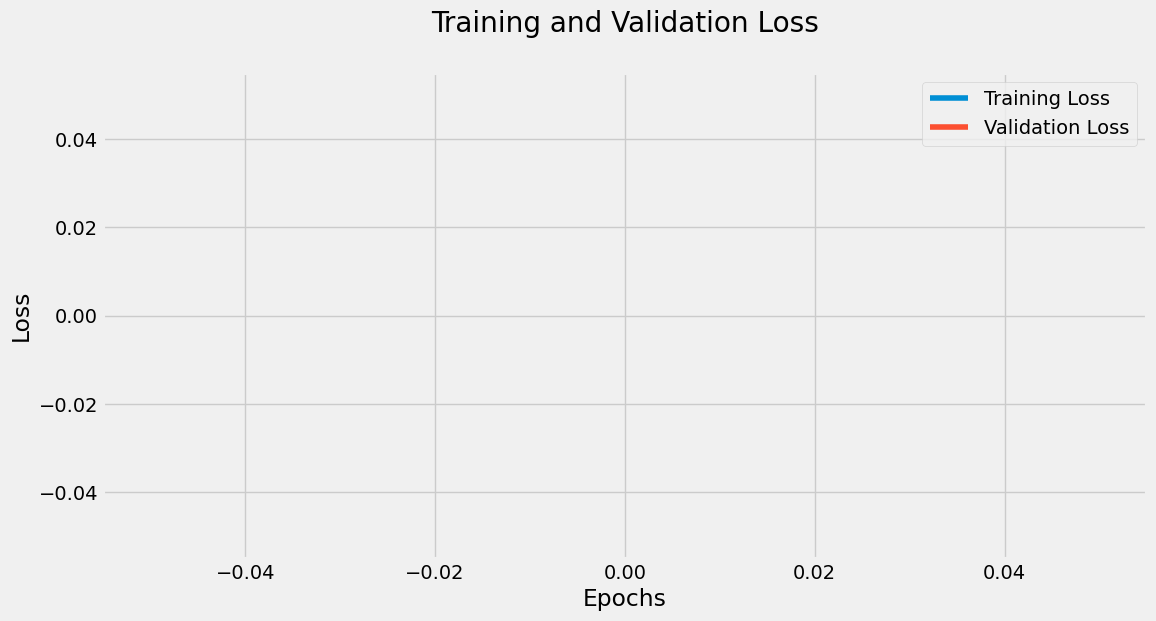

In [46]:
plt.figure(figsize = (12, 6))  

train_loss = model_history.history['loss']  
val_loss = model_history.history['val_loss']  

epoch = range(1, len(train_loss) + 1)  

sns.lineplot(x=list(epoch), y=train_loss, label='Training Loss')  
sns.lineplot(x=list(epoch), y=val_loss, label='Validation Loss') 

plt.title('Training and Validation Loss\n')  
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.legend()  
plt.show()  

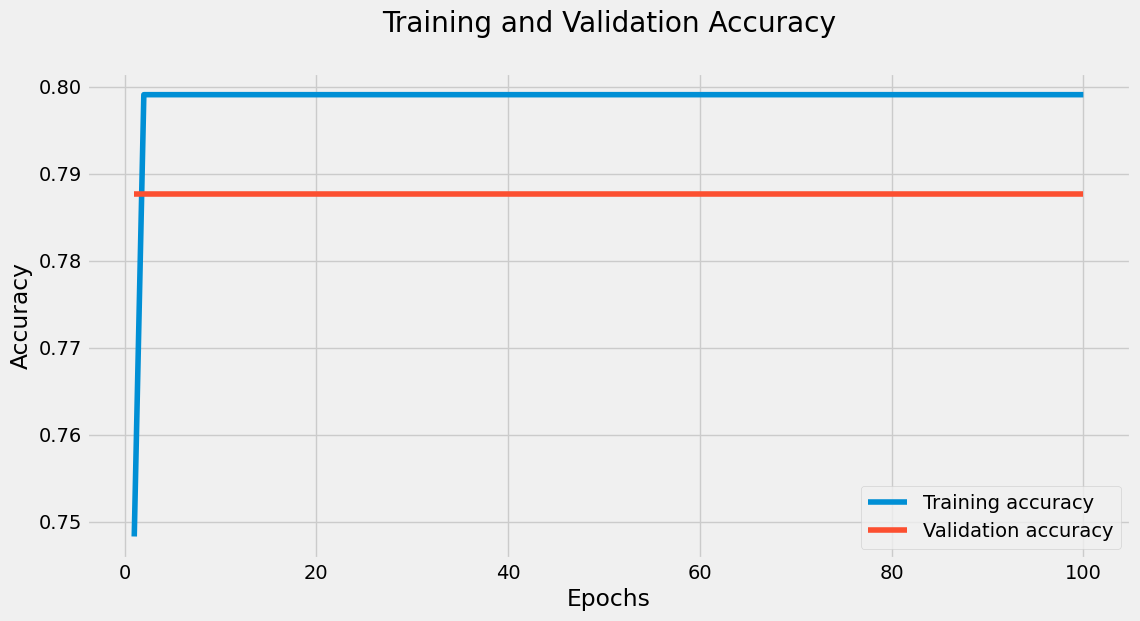

In [47]:
plt.figure(figsize = (12, 6))  

train_loss = model_history.history['accuracy']  
val_loss = model_history.history['val_accuracy']  

epoch = range(1, len(train_loss) + 1)  

sns.lineplot(x=list(epoch), y=train_loss, label='Training accuracy')  
sns.lineplot(x=list(epoch), y=val_loss, label='Validation accuracy')  

plt.title('Training and Validation Accuracy\n')  
plt.xlabel('Epochs')  
plt.ylabel('Accuracy')  
plt.legend()  
plt.show()  

In [48]:
acc = model.evaluate(X_test, y_test)[1]  

print(f'Accuracy of model is {acc}')  

79/79 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.7877
Accuracy of model is 0.7876849174499512


In [49]:
model.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_2 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 7)                 77        
                                                                 
 dropout_3 (Dropout)         (None, 7)                 0         
                                                                 
 batch_normalization_3 (Bat  (None, 7)                 28        
 chNormalization)                                     